# Trabalho Computacional 1 
- **Inteligência Computacional Aplicada**
- **Aluno**: Matheus Araujo dos Santos (matheus.santos@lapisco.ifce.edu.br)
- Programa de Pós-Graduacão em Engenharia Elétrica (PPGEE)
- Universidade Federal do Ceará, *Campus* do Pici, Fortaleza, Ceará, Brasil

## Questão 2.2 - Regressão com Extreme Learning Machine (ELM)

Semelhante à MLP, tem-se a Máquina de Aprendizado Extremo, ou *Extreme Learning Machine* (ELM), que consiste em uma arquitetura de rede neural do tipo *feedforward*, i. e., sem realimentação (ou *backpropagation*) [1]. Isso resulta em uma rede neural tão eficaz quanto à MLP e com treinamento bem mais rápido. 

Além disso, nessa implementação, a ELM usa o método dos mínimos quadrados no cálculo da pseudo-inversa da matriz dos dados, o que torna esse algoritmo ainda mais rápido [1].

Para essa implementação, utilizou-se 3 mil neurônios na camada oculta e função de ativação sigmóide na entrada e ativação linear na saída (por ser um problema de regressão).

### Sobre o dataset
A regressão foi feita para o *dataset* ***Real estate valuation data set***, de estimação de preços de imóveis, com base em fatores de latitude, longitude, lojas de conveniência próximas e etc [2]. O único pré-processamento utilizado foi a concatenação da matriz de atributos com um vetor de viés (*bias*), resultando em 7 variáveis regressoras. O dataset tem um total de 414 dados.

### Resultados
Dessa forma, após as devidas transformações matriciais, obteve-se um R2 de **0.996** para o modelo regressor de ELM (bem maior do que o obtido para o regressor linear). A reta de predição, sobreposta aos dados, pode ser vista na figura abaixo.

**Referências:**
1. G. B. Huang, Q. Y. Zhu, and C. K. Siew. Extreme learning machine: Theory and applications. *Neurocomputing*, 70(1–3):489–501, 2006.
2. Yeh, I. C., & Hsu, T. K., Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271, 2018.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregando dataset
dataset = pd.read_excel("dataset/Real estate valuation data set.xlsx", engine='openpyxl')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [8]:
data = np.array(dataset.iloc[:, :].T)

# Separando X e y
X_raw = data[1:-1].T
X = np.column_stack((X_raw, np.ones(X_raw.shape[0]))) # Adicionar uma coluna de 1s para considerar o termo de bias (intercept)
y = data[-1].reshape(-1, 1) # Vetorizando

X.shape, y.shape

((414, 7), (414, 1))

In [9]:
# Funções de ativação
def activate_functions(type, matrix):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-matrix))
    elif type == 'softmax':
        exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
        return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)   
    elif type == 'tanh':
        return np.tanh(matrix)

# Função de treino do regressor ELM
def train_elm_regression(X, y, n_neurons_hlayer):
    n_classes = y.shape[1]
    n_features = X.shape[1]

    w_input = np.random.randn(n_features, n_neurons_hlayer) * 0.1
    w_output = np.random.randn(n_neurons_hlayer, 1) * 0.1

    # Forward
    Zin = X @ w_input
    result_in = activate_functions('sigmoid', Zin) # Ativação sigmóide

    Zm = np.linalg.pinv(result_in) @ y # Matriz de pesos M

    # Forward
    Zout = result_in @ Zm
    result_out = Zout # Ativação linear

    return result_out

In [10]:
# Realizar a predição
y_pred = train_elm_regression(X, y, n_neurons_hlayer=3000)

print(y_pred.shape)
print(y.shape)

/tmp/ipykernel_76942/565507851.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-matrix))


(414, 1)
(414, 1)


In [11]:
from sklearn.metrics import r2_score

# Avaliar o desempenho do regressor
r2 = r2_score(y, y_pred)

print("R²: {}".format(r2))

R²: 0.9966925782964373


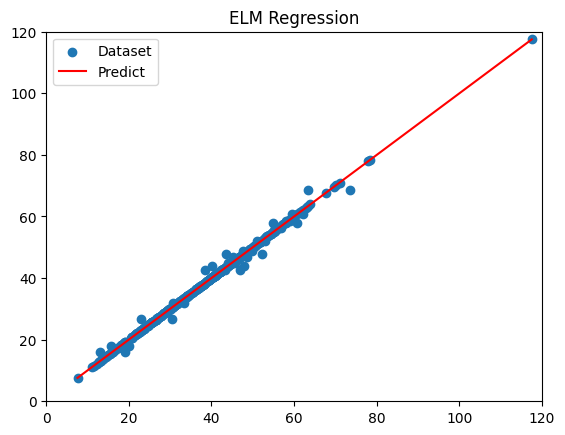

In [12]:
plt.scatter(y, y_pred, label='Dataset')
plt.plot([np.min(y), np.max(y)], [np.min(y_pred), np.max(y_pred)], color='red', label='Predict')
plt.title('ELM Regression')
plt.legend()
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.show()